In [84]:
import pandas as pd 
import numpy as np
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

from sklearn.impute import SimpleImputer 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [85]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [86]:
mis_col = data.isna().sum() * 100/len(data)
# mis_col.sort_values(ascending=False)

In [87]:
data.duplicated().sum()
data.drop_duplicates(subset=None, inplace=True, ignore_index=False, keep='first')
data.duplicated().sum()

0

In [88]:
sex_dic = data.sex 
smok_dic = data.smoker 
regi_dic = data.region

In [89]:
cat_val = ['sex', 'smoker', 'region']
data[cat_val] = data[cat_val].apply(LabelEncoder().fit_transform)
# data.head(1)

In [90]:
le_sex = data.sex 
le_smoke = data.smoker 
le_regi = data.region 

In [91]:
ori_dic_region = np.unique(regi_dic)
new_dic_region = np.unique(le_regi)

region_dictionary = dict(zip(ori_dic_region, new_dic_region))
region_dictionary

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}

In [92]:
# data.corr()['charges'].sort_values(ascending=False)

C:\Users\amunv\AppData\Local\Temp\ipykernel_21140\3444367750.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)


<AxesSubplot:>

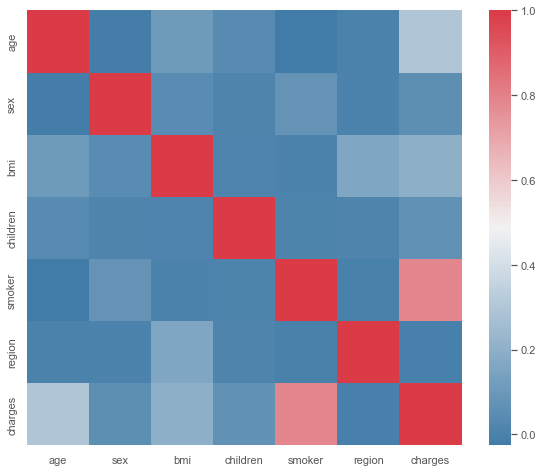

In [93]:
f, ax = plt.subplots(figsize=(10,8))

data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)

Text(0.5, 1.0, 'Smokers Distribution')

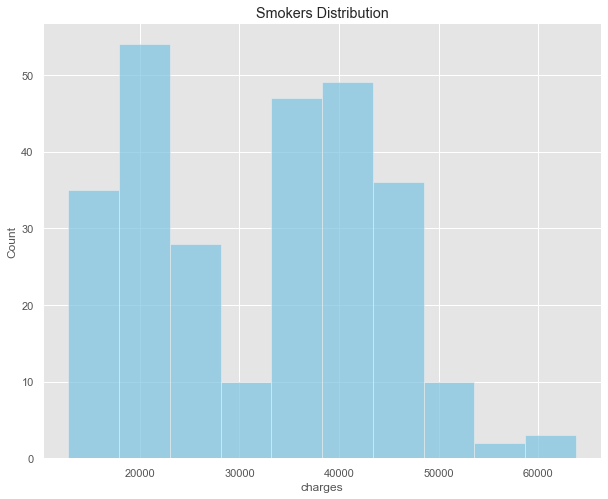

In [94]:
f,ax = plt.subplots(figsize=(10,8))

sns.histplot(data[(data.smoker == 1)]['charges'], color='c', ax=ax)
ax.set_title('Smokers Distribution')

In [95]:
X = data.drop(columns=['charges'], axis=1)
y = data.charges

In [96]:
scale = StandardScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(np.array(y).reshape(-1,1))